In [6]:
ls

Company_Data.csv                     assignment2/
Fraud_check.csv                      finished assignment/
Problem_statement(Fraudcheck).txt    problem statement(company data).txt
RANDOM FOREST FRAUD CHECKS.ipynb     unsubmitted assignment/


In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter

In [207]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# DATA EXPLORATION

In [208]:
data.shape

(600, 6)

In [209]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [210]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [211]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [212]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [213]:
data1=data.copy()
data1['taxable_category'] = pd.cut(x = data1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data1.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
573,YES,Married,59227,116161,20,NO,Good
336,NO,Married,62800,73146,5,NO,Good
559,YES,Divorced,72026,180424,26,NO,Good
441,NO,Divorced,42074,70314,24,NO,Good
416,NO,Single,64230,33982,30,NO,Good


In [214]:
print(data1.columns)
print(data1["taxable_category"].dtype)

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'taxable_category'],
      dtype='object')
category


# DATA VISUALISATION

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '\n TAXABLE INCOME')

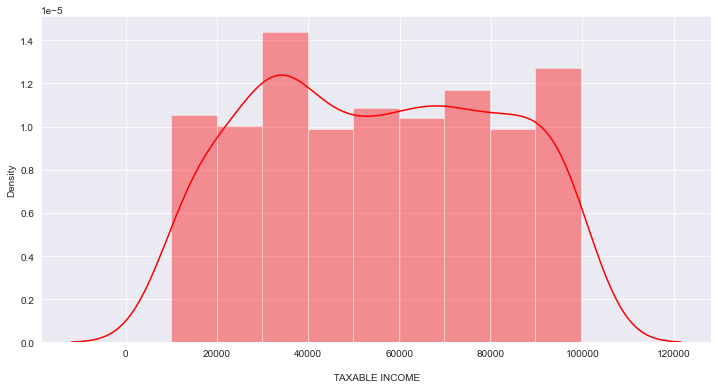

In [85]:
plt.figure(figsize=[12,6])
sns.distplot(data1[["Taxable.Income"]],color = "red")
plt.xlabel('\n'+" TAXABLE INCOME")

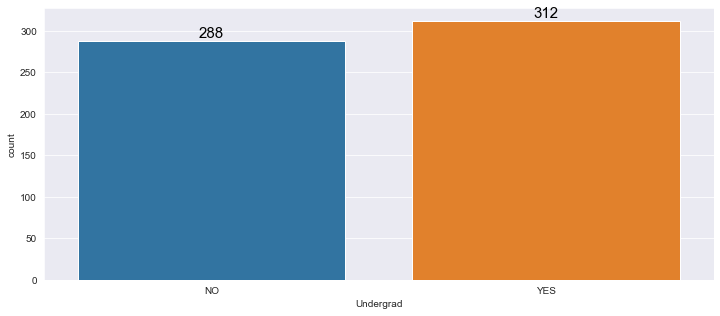

In [114]:

plt.figure(figsize=[12,5])
ax = sns.countplot(x="Undergrad", data=data1)

for i in ax.containers:
    ax.bar_label(i, fontsize=15, color='black')

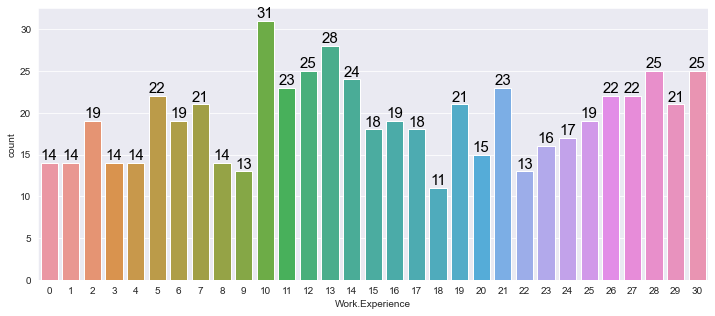

In [113]:
plt.figure(figsize=[12,5])
ax = sns.countplot(x="Work.Experience", data=data1)

for i in ax.containers:
    ax.bar_label(i, fontsize=15, color='black')


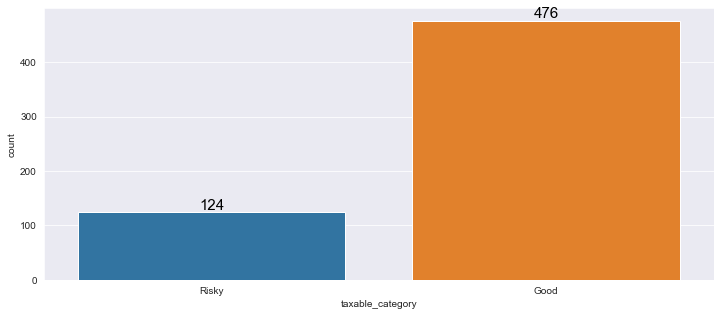

In [86]:
plt.figure(figsize=[12,5])
ax = sns.countplot(x="taxable_category", data=data1)

for i in ax.containers:
    ax.bar_label(i, fontsize=15, color='black')


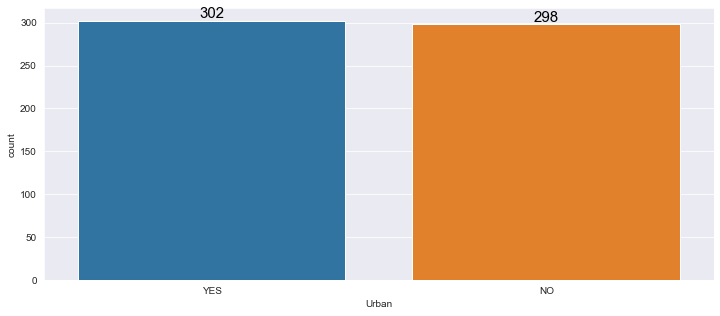

In [112]:
plt.figure(figsize=[12,5])
ax = sns.countplot(x="Urban", data=data1)

for i in ax.containers:
    ax.bar_label(i, fontsize=15, color='black')

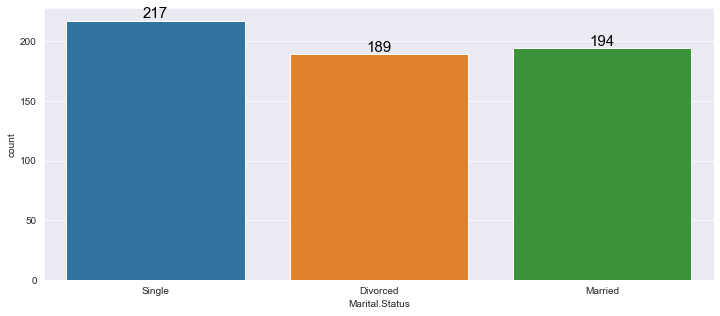

In [109]:
plt.figure(figsize=[12,5])
ax = sns.countplot(x="Marital.Status", data=data1)

for i in ax.containers:
    ax.bar_label(i, fontsize=15, color='black')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


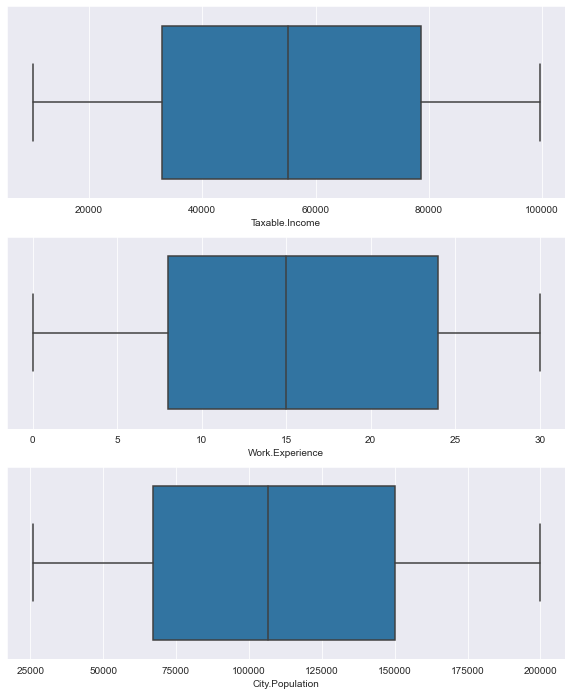

In [126]:
cols = ['Taxable.Income',  "Work.Experience", "City.Population"]

# Create the subplots
fig, axs = plt.subplots(len(cols), 1, figsize=[10, 4*len(cols)], sharey=True)

# Loop over the columns
for i, col in enumerate(cols):
    sns.boxplot(data[col], ax=axs[i])
   


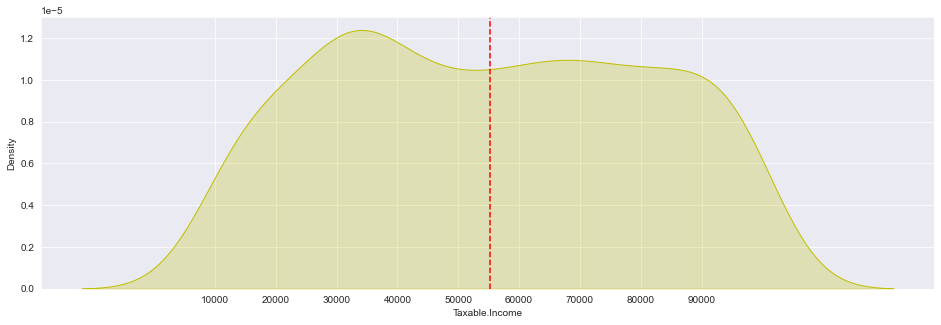

In [108]:
plt.figure(figsize=(16,5))
mean = data1['Taxable.Income'].mean()
ax = sns.kdeplot(data1['Taxable.Income'],shade=True,color='y')
ax.axvline(mean, color='red', linestyle='--')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()
#the data is negatively skewed ,  there are more data points on the right side of the plotplt.figure(figsize=[10,4])


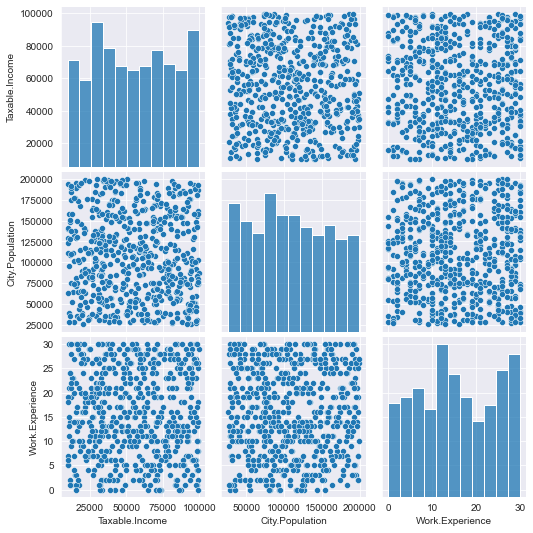

In [135]:
sns.pairplot(data1)

In [137]:
data1.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

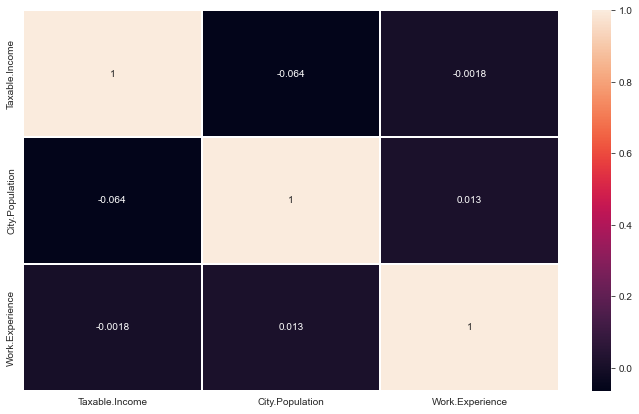

In [146]:
plt.figure(figsize=[12,7])
sns.heatmap(data1.corr(),annot=True,linewidths=.01)

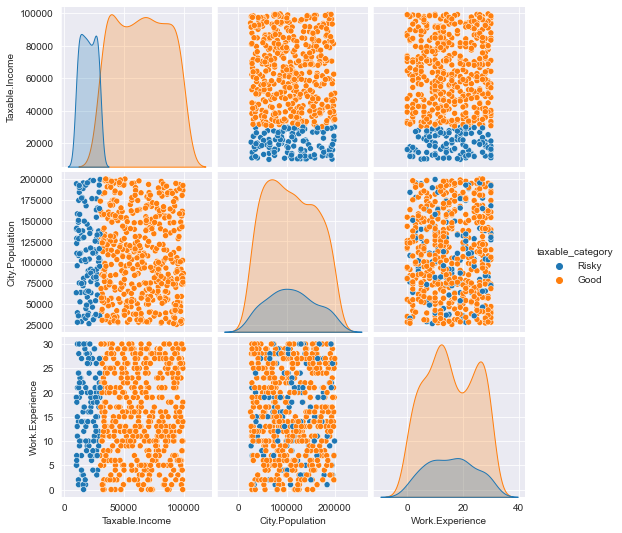

In [150]:
# using paiplot to illustrate the taxable catagory in the whole sample

sns.pairplot(data=data1, hue = 'taxable_category')

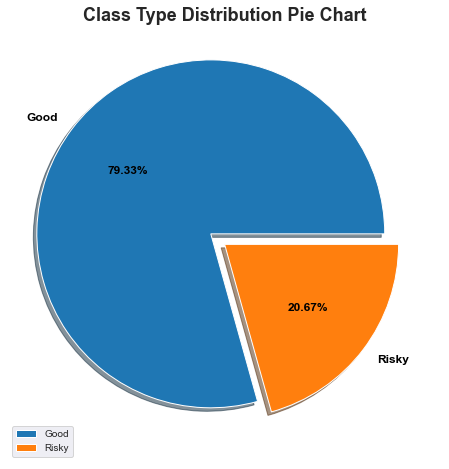

In [275]:
plt.figure(figsize = (12,8))
plt.pie(data1['taxable_category'].value_counts(),
       labels=data1.taxable_category.unique(),
       explode = [.1,0.0],
       autopct= '%.2f%%',
       shadow= True,
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'lower left')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()
#approximately 20% of the sample data is risky and the rest is good

In [219]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()

In [220]:
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_5020/3062109685.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [221]:
data1 = pd.get_dummies(data1, columns = ['Undergrad','Marital.Status','Urban'])
     

In [222]:
data1.sample(3)

,Taxable.Income,City.Population,Work.Experience,taxable_category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
491,24541,82029,10,Risky,1,0,1,0,0,1,0
556,42063,34242,12,Good,1,0,0,0,1,1,0
425,79593,121506,27,Good,0,1,1,0,0,1,0


In [223]:
data1.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

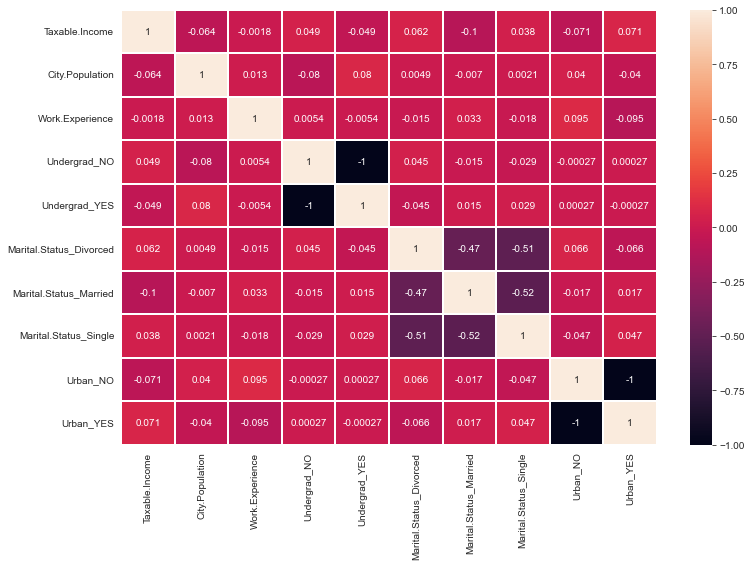

In [224]:
plt.figure(figsize=[12,8])
sns.heatmap(data1.corr(),annot=True,linewidths=.01)

# CREATE RANDOM FOREST MODEL

In [225]:
data1

,Taxable.Income,City.Population,Work.Experience,taxable_category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,Good,1,0,0,0,1,0,1
1,33700,134075,18,Good,0,1,1,0,0,0,1
2,36925,160205,30,Good,1,0,0,1,0,0,1
3,50190,193264,15,Good,0,1,0,0,1,0,1
4,81002,27533,28,Good,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,Good,0,1,1,0,0,0,1
596,69967,55369,2,Good,0,1,1,0,0,0,1
597,47334,154058,0,Good,1,0,1,0,0,0,1
598,98592,180083,17,Good,0,1,0,1,0,1,0


In [226]:
list(data1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'taxable_category',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [289]:
X = data1.iloc[:,[1,2,4,5,6,7,8,9]]
y = data1.iloc[:,3]

In [290]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO
0,50047,10,1,0,0,0,1,0
1,134075,18,0,1,1,0,0,0
2,160205,30,1,0,0,1,0,0
3,193264,15,0,1,0,0,1,0
4,27533,28,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0
596,55369,2,0,1,1,0,0,0
597,154058,0,1,0,1,0,0,0
598,180083,17,0,1,0,1,0,1


In [291]:
pd.DataFrame(y.sample(5))

,taxable_category
344,Good
404,Good
23,Good
184,Good
163,Risky


In [292]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
     

In [293]:
y_train.value_counts()

Good     382
Risky     98
Name: taxable_category, dtype: int64

In [294]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7416666666666667

In [295]:
pred_x_test = model.predict(x_test)

In [296]:
#accuracy score of test variable
accuracy_score(y_test,pred_x_test)

0.7166666666666667

In [297]:
confusion_matrix(y_test,pred_x_test)

array([[85,  9],
       [25,  1]])

In [298]:
pred_x_train=model.predict(x_train)

In [299]:
#accuracy score of train set
accuracy_score(y_train,pred_x_train)

1.0

In [300]:
confusion_matrix(y_train,pred_x_train)

array([[382,   0],
       [  0,  98]])

In [301]:
data_pred=pd.DataFrame({'Actual':y_test, 'Predicted':pred_x_test})
data_pred

,Actual,Predicted
362,Risky,Good
324,Good,Good
370,Good,Good
437,Risky,Good
50,Good,Good
...,...,...
177,Good,Good
104,Good,Good
25,Good,Good
345,Good,Good


In [302]:
model.feature_importances_

array([0.52089769, 0.37198752, 0.01260127, 0.01261882, 0.0161104 ,
       0.0139138 , 0.01381937, 0.03805113])

In [303]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending =False)
fi

,feature,importance
0,City.Population,0.520898
1,Work.Experience,0.371988
7,Urban_NO,0.038051
4,Marital.Status_Divorced,0.016110
5,Marital.Status_Married,0.013914
6,Marital.Status_Single,0.013819
3,Undergrad_YES,0.012619
2,Undergrad_NO,0.012601
